# Zero to Hero ML Workshop
Conducted by Akash & Marcus (AI Club Data Science Trainers) <br/>
## What's covered in this notebook:
1. Data Loading
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Data Preparation
5. Machine Learning
6. Conclusion

Before we begin: download the datasets here. total of 5 files. <br/>

The Kaggle way:
https://www.kaggle.com/datasets/marcusngjh/hdb-resale-prices/settings

The Google Drive way:
https://drive.google.com/drive/folders/1kHKwtpk4i8Vse7PQ50NHf73b-KO0MjBs?usp=sharing <br/>

You can mount to your drive for easy access through Google Colab

# Data Loading

In [100]:
!pip install pywaffle
!pip install joypy
!pip install yellowbrick
from pywaffle import Waffle
import joypy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from statsmodels.api import qqplot
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import CooksDistance


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
price1999 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2020 = pd.read_csv('./input/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

In [106]:
price1999.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [107]:
print("1990 to 1999: \n", price1999.columns)
print("\n 1999 to 2012: \n", price2012.columns)
print("\n 2012 to 2014: \n", price2014.columns)
print("\n 2014 to 2016: \n", price2016.columns)
print("\n 2016 to 2020: \n", price2020.columns)

1990 to 1999: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 1999 to 2012: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2012 to 2014: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2014 to 2016: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')

 2016 to 2020: 
 Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='objec

In [108]:
price1999.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287200 entries, 0 to 287199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287200 non-null  object 
 1   town                 287200 non-null  object 
 2   flat_type            287200 non-null  object 
 3   block                287200 non-null  object 
 4   street_name          287200 non-null  object 
 5   storey_range         287200 non-null  object 
 6   floor_area_sqm       287200 non-null  float64
 7   flat_model           287200 non-null  object 
 8   lease_commence_date  287200 non-null  int64  
 9   resale_price         287200 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


Notice that month is an object data type <br/>
Convert to DateTime series for easier data processing and feature engineering.

## Merge DataFrames

In [109]:
prices = pd.concat([price1999, price2012, price2014, price2016, price2020], ignore_index=True, sort=False)
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841631 entries, 0 to 841630
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                841631 non-null  object 
 1   town                 841631 non-null  object 
 2   flat_type            841631 non-null  object 
 3   block                841631 non-null  object 
 4   street_name          841631 non-null  object 
 5   storey_range         841631 non-null  object 
 6   floor_area_sqm       841631 non-null  float64
 7   flat_model           841631 non-null  object 
 8   lease_commence_date  841631 non-null  int64  
 9   resale_price         841631 non-null  float64
 10  remaining_lease      80374 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 70.6+ MB


Note that "month" is an object Dtype - convert to datetime to simplify feature engineering / data engineering process

In [110]:
prices['month'] = pd.to_datetime(prices['month']) # to datetime for feature engineering

Check for NAs in overall dataframe

In [111]:
prices[~prices.isnull().any(axis=1)]['month'].dt.year.unique()

array([2017, 2018, 2019, 2020], dtype=int64)

Lots of NAs after 2015 sales onwards. Interesting, let's move on.

# Data Cleaning / Preprocessing

In [112]:
# Clean flat type
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [113]:
# Rename flat model duplicates
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()

Model A                 231676
Improved                221589
New Generation          180840
Simplified               55180
Standard                 40817
Premium Apartment        36049
Apartment                32732
Maisonette               29210
Model A2                  9325
DBSS                      1476
Adjoined flat             1119
Terrace                    651
Multi Generation           518
Type S1S2                  210
Executive Maisonette       200
2-room                      39
Name: flat_model, dtype: int64

**Types of Flat Models:**

[**Standard:**](https://www.teoalida.com/singapore/hdbfloorplans/) (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974. <br>
[**Improved:**](https://www.teoalida.com/singapore/hdbfloorplans/) (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974. <br>
[**New Generation:**](https://www.teoalida.com/singapore/hdbfloorplans/) Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room. <br>
[**Model A:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm) <br>
[**Model A2:**](https://www.teoalida.com/singapore/hdbfloorplans/) Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm) <br>
[**Simplified:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm) <br>
[**Multi Generation:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) 3Gen flats designed to meet the needs of multi-generation families. <br>
[**Maisonette:**](https://sg.finance.yahoo.com/news/different-types-hdb-houses-call-020000642.html#:~:text=Model%20A%20Maisonettes%20are%20HDB,ft%20to%201%2C551%20sq%20ft.) AKA Model A Maisonette — 2 storeys HDB flat <br>
[**Premium Apartment:**](https://www.teoalida.com/singapore/hdbfloorplans/) Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes <br>
[**Executive Maisonette:**](https://sg.finance.yahoo.com/news/different-types-hdb-houses-call-020000642.html#:~:text=Model%20A%20Maisonettes%20are%20HDB,ft%20to%201%2C551%20sq%20ft.) More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995 <br>
[**Executive Apartment:**](https://www.teoalida.com/singapore/hdbfloorplans/) Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments. <br>
[**DBBS:**](https://www.propertyguru.com.sg/property-guides/dbss-singapore-17893) public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos <br>
[**Adjoined Flat:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) Large HDB flats which are combined from 2 HDB flats <br>
[**Terrace:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued <br>
[**Type S1S2:**](http://getforme.com/previous2004/previous290504_hdblaunchesthepinnancleatduxton.htm)  apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively <br>
[**2-room:**](https://blog.carousell.com/property/hdb-flat-types-singapore/) Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area <br>

In [114]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '49 TO 51', '46 TO 48', '43 TO 45'],
      dtype=object)

In [115]:
prices['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

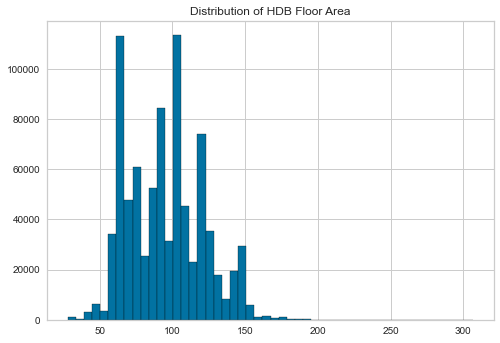

Terrace                 60
Maisonette              15
Executive Maisonette     7
Apartment                4
Adjoined flat            1
Name: flat_model, dtype: int64

In [116]:
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

The floor area outliers mostly belong to special HDBs that are larger than the standard ones. So they might not be outliers from a multivariate perspective.

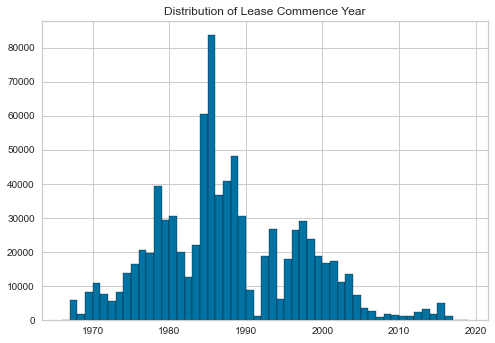

In [117]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

## Inflation Adjustment using CPI (Consumer Price Index)

In [118]:
# Compute Resale Price Adjusted for Inflation Using Consumer Price Index for Housing & Utilities
# https://www.singstat.gov.sg/find-data/search-by-theme/economy/prices-and-price-indices/latest-data
# cpi = pd.read_csv()
cpi = pd.read_csv('./input/resale-flat-prices/CPI.csv')
cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
prices = prices.merge(cpi, on='month', how='left')
# https://people.duke.edu/~rnau/411infla.htm
prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100

c:\Users\Akash\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:2652: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
c:\Users\Akash\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\patches.py:2656: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


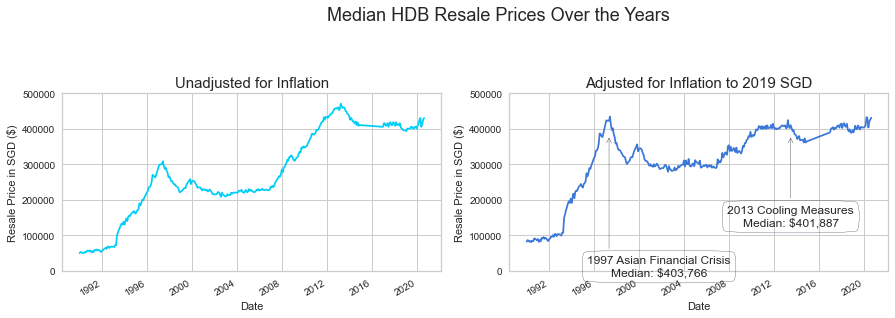

In [119]:
# Plot Median Resale Prices Over the Years

# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
prices.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)

# Adjusted
# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
ax2 = fig.add_subplot(122)
prices.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 500000), ax2.set_title('Adjusted for Inflation to 2019 SGD',size=15)
ax2.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',380000), xycoords='data',
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2013 Cooling Measures\nMedian: $401,887', xy=('2013-07-01',380000), xycoords='data',
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
# for ax, color in zip([ax1, ax2], ['#3c78d8', '#3c78d8']):
#     plt.setp(tuple(ax.spines.values()), color=color)
#     plt.setp([ax.get_xticklines(), ax.get_yticklines()], color=color)
plt.show()
#prices.set_index('month').loc['1997']['real_price'].median()

Context: Following the collapse of the thai Baht in July 1997, housing prices in Singapore continue to fall and only started gradually increasing again around 2004. In 2013, it experienced a decline due to 'Propery Market Cooling Measures', such as the Additional Buyer's Stamp Duty (ABSD), Loan-to-Value (LTV) Ratio, and Total Debt Servicing Ratio (TDSR). Refer [here](https://www.srx.com.sg/cooling-measures) for more information.

## Convert remaining_lease to number of years

In [120]:
# Convert remaining_lease to number of years
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))

In [121]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841631 entries, 0 to 841630
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                841631 non-null  datetime64[ns]
 1   town                 841631 non-null  object        
 2   flat_type            841631 non-null  object        
 3   block                841631 non-null  object        
 4   street_name          841631 non-null  object        
 5   storey_range         841631 non-null  object        
 6   floor_area_sqm       841631 non-null  float64       
 7   flat_model           841631 non-null  object        
 8   lease_commence_date  841631 non-null  int64         
 9   resale_price         841631 non-null  float64       
 10  remaining_lease      80374 non-null   float64       
 11  cpi                  841631 non-null  float64       
 12  real_price           841631 non-null  float64       
dtypes: datetime64[

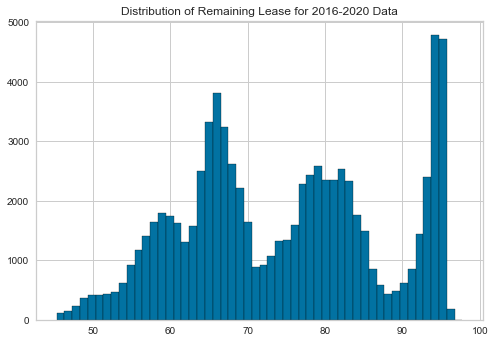

In [122]:
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2016-2020 Data')
plt.show()

In [123]:
prices.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,NaN,60.894,14779.781259
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,NaN,60.894,9853.187506
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,NaN,60.894,13137.583342


# Exploratory Data Analysis

## By Flat Type
Waffle chart for flat type - number of rooms

C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\977612409.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  flattype1519 = prices.set_index('month')['2015':'2019']['flat_type'].value_counts() / len(prices.set_index('month')['2015':'2019']) * 100


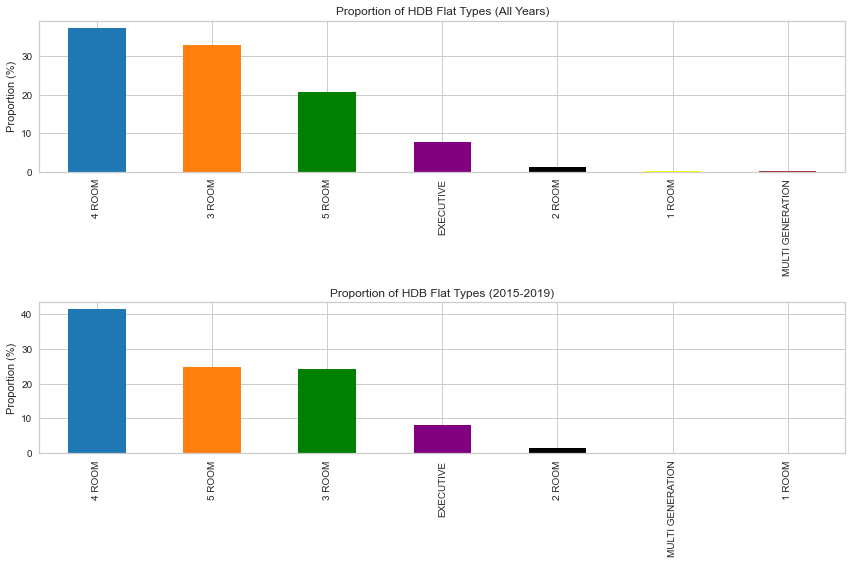

In [124]:
import matplotlib.pyplot as plt

# Calculate proportions
flattype = prices['flat_type'].value_counts() / len(prices) * 100
flattype1519 = prices.set_index('month')['2015':'2019']['flat_type'].value_counts() / len(prices.set_index('month')['2015':'2019']) * 100

# Plotting
plt.figure(figsize=(12, 8))

# Plot for all years
plt.subplot(2, 1, 1)
flattype.plot(kind='bar', color=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'], legend=False)
plt.title('Proportion of HDB Flat Types (All Years)')
plt.xlabel('')  # No x-axis label
plt.ylabel('Proportion (%)')

# Plot for 2015-2019
plt.subplot(2, 1, 2)
flattype1519.plot(kind='bar', color=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'], legend=False)
plt.title('Proportion of HDB Flat Types (2015-2019)')
plt.xlabel('')  # No x-axis label
plt.ylabel('Proportion (%)')

plt.tight_layout()
plt.show()


There are not many 1 Room, 2 Room and Multi Generation flats, so they will be removed for looking at flat types.



In [125]:
flattype = ['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
prices1519 = prices.set_index('month').sort_index().loc['2015-01':'2019-12']
prices1519 = prices1519[prices1519['flat_type'].isin(flattype)][['flat_type','resale_price']].reset_index()
prices1519['flat_type_year'] = prices1519['flat_type'] + ' - ' + prices1519['month'].apply(lambda x: str(x)[:4])
prices1519

,month,flat_type,resale_price,flat_type_year
0,2017-01-01,4 ROOM,335000.0,4 ROOM - 2017
1,2017-01-01,4 ROOM,305000.0,4 ROOM - 2017
2,2017-01-01,5 ROOM,860000.0,5 ROOM - 2017
3,2017-01-01,5 ROOM,800000.0,5 ROOM - 2017
4,2017-01-01,5 ROOM,790000.0,5 ROOM - 2017
...,...,...,...,...
63270,2019-12-01,4 ROOM,378888.0,4 ROOM - 2019
63271,2019-12-01,4 ROOM,490000.0,4 ROOM - 2019
63272,2019-12-01,4 ROOM,390000.0,4 ROOM - 2019
63273,2019-12-01,4 ROOM,410000.0,4 ROOM - 2019


## By Town

This code takes a dataset of housing prices and performs the following steps:

Filtering: It picks out only the housing data from the years 2018 and 2019.

Grouping: It groups this filtered data by the towns where the houses are located.

Median Calculation: For each town, it finds the median (middle) value of the year when the lease for the housing started.

Sorting: It arranges these towns based on the calculated median lease start date, from the earliest lease start date to the latest.

In simpler terms, it's finding out which towns tend to have older or newer homes based on when their leases started, focusing only on data from the last couple of years.

## By Storeys

In [128]:
prices.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'cpi', 'real_price'],
      dtype='object')

C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\2850307963.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\2850307963.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\2850307963.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels); ax2.set_ylabel('')


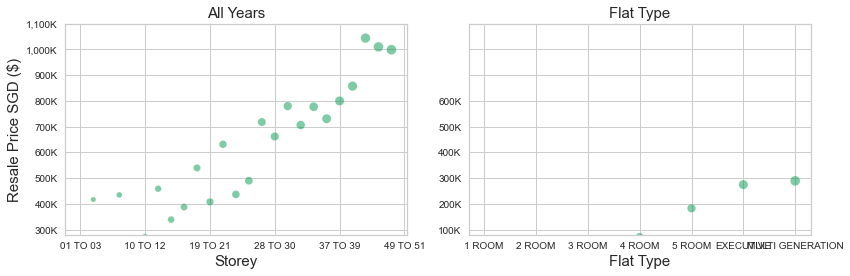

In [129]:
fig = plt.figure(figsize=(12,4))

# Storey Prices
ax1 = plt.subplot(121)
storey = prices.groupby('storey_range')['resale_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['resale_price'], size=storey['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

# Flat Type Prices
ax2 = plt.subplot(122)
flattype = prices.groupby('flat_type')['resale_price'].median().reset_index().sort_values(by='flat_type')
flattype['flattype_rank'] = flattype['flat_type'].astype('category').cat.codes

# Bubble chart
b=sns.scatterplot(x=flattype['flattype_rank'], y=flattype['resale_price'], size=flattype['flattype_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax2)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels); ax2.set_ylabel('')
ax2.set_xticks(flattype['flattype_rank'])
ax2.set_xticklabels(flattype['flat_type'])
ax2.set_ylim([280000,1100000]), ax2.set_xlabel('Flat Type', size=15)
ax2.set_title('Flat Type', size=15)

plt.tight_layout()
plt.show()


We notice from the data viz a linear relationship, with higher storeys being sold at a higher price.




*Summary of Visualization:*

1. **Figure Setup**:
   - Created a figure with a size of 12x4 inches to accommodate multiple subplots.

2. **Storey Prices Visualization**:
   - **Data Processing**: Grouped the data by 'storey_range' and calculated the median resale price for each range.
   - **Encoding**: Encoded 'storey_range' as categorical codes for plotting purposes.
   - **Plotting**: Created a scatter plot (`sns.scatterplot()`) with 'storey_rank' on the x-axis and median resale prices on the y-axis.
   - **Label Formatting**: Formatted y-axis labels to represent prices in thousands (SGD).
   - **Tick Manipulation**: Set custom x-axis tick positions and labels to improve readability.
   - **Axis Labels and Title**: Added labels and a title to describe the visualization.

3. **Flat Type Prices Visualization**:
   - **Data Processing**: Grouped the data by 'flat_type' and calculated the median resale price for each flat type.
   - **Encoding**: Encoded 'flat_type' as categorical codes for plotting.
   - **Plotting**: Created another scatter plot to visualize median resale prices by flat type.
   - **Label Formatting**: Formatted y-axis labels to represent prices in thousands (SGD).
   - **Tick Manipulation**: Set custom x-axis tick positions and labels based on flat types.
   - **Axis Labels and Title**: Added labels and a title to describe the visualization.

4. **Plot Arrangement**:
   - Used `plt.subplot()` to arrange the two scatter plots side by side within the figure.

5. **Display**:
   - Used `plt.tight_layout()` to adjust subplot parameters for better appearance.
   - Displayed the plot using `plt.show()`.


## By Floor Area

In [130]:
# Floor Area Prices
area = prices[prices['year'].isin([2015,2016,2017,2018,2019])]
p=sns.regplot(x='floor_area_sqm', y='resale_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

KeyError: 'year'

In [131]:
display(area[area['floor_area_sqm'] > 200])

NameError: name 'area' is not defined

Those cases on top right of the chart consists of flats that are either Terrace or Executive Maisonette, which is not surprising.

## By Block Number
3 digit system was introduced in the 1970s, with the 1st digit representing a neighbourhood in a town. So for e.g., AMK neighbourhood 1 starts with 101, and AMK neighbourhood 2 starts with 201. So first digit was separated from last 2 digits and plotted separately

C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\315562222.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\315562222.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


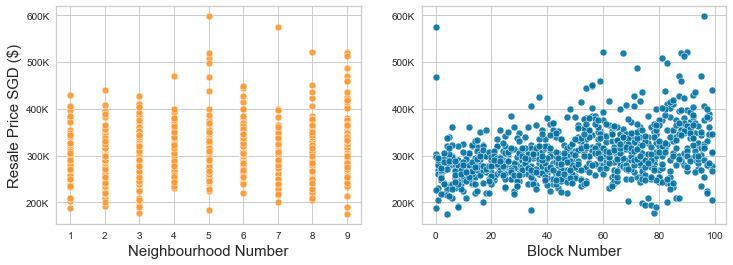

In [132]:
import re

# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
prices['blocknum'] = prices['block'].apply(get_num) # get only digits from block number
tmp = prices[prices['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['resale_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['resale_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['resale_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

## By Flat Model

C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\46382373.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


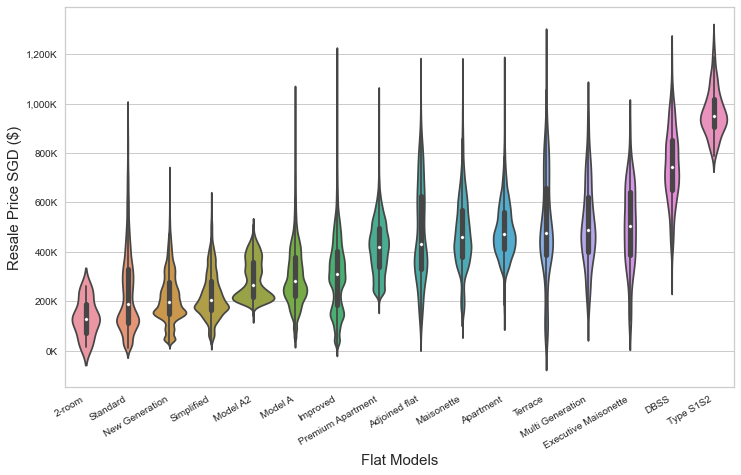

In [133]:
# Violin plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='resale_price', data=prices, width=1,
                order=prices.groupby('flat_model')['resale_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

The special models like the Type S1S2 (The Pinnacle@Duxton) and Terrace tend to fetch higher prices while the older models from the 1900s tend to go lower.


## By Lease Commence Date
Boxplot for each year of lease commence date

C:\Users\Akash\AppData\Local\Temp\ipykernel_18476\603668167.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


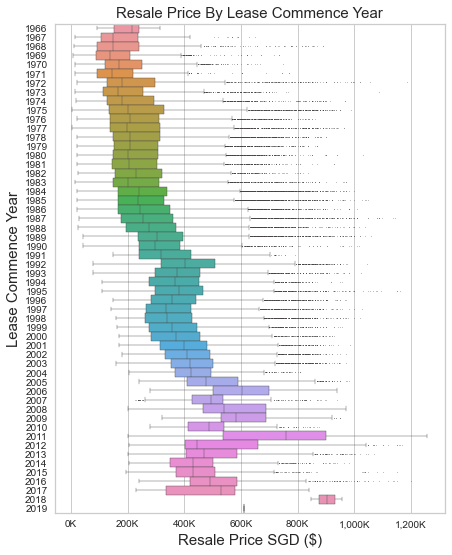

In [134]:
fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='resale_price', data=prices, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()

In [135]:
tmp = prices[prices['year'].isin([2015,2016,2017,2018,2019])]
fig, axes = joypy.joyplot(tmp, by="lease_commence_date", column="resale_price",figsize=(6,10),
             linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
axes[-1].set_xlim([-50000,1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

KeyError: 'year'

## Median resale price in various towns

In [ ]:
prices.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'blocknum'],
      dtype='object')

In [ ]:
prices.groupby('town')['resale_price'].median()

town
ANG MO KIO         210000.0
BEDOK              232500.0
BISHAN             382000.0
BUKIT BATOK        238000.0
BUKIT MERAH        280000.0
BUKIT PANJANG      296000.0
BUKIT TIMAH        400000.0
CENTRAL AREA       230000.0
CHOA CHU KANG      321000.0
CLEMENTI           226000.0
GEYLANG            224000.0
HOUGANG            280000.0
JURONG EAST        250000.0
JURONG WEST        268000.0
KALLANG/WHAMPOA    260000.0
LIM CHU KANG        61750.0
MARINE PARADE      290000.0
PASIR RIS          380000.0
PUNGGOL            445000.0
QUEENSTOWN         185000.0
SEMBAWANG          358000.0
SENGKANG           415000.0
SERANGOON          285000.0
TAMPINES           305000.0
TOA PAYOH          235000.0
WOODLANDS          285000.0
YISHUN             237000.0
Name: resale_price, dtype: float64

# Data Preparation

## Missing Values
Replace missing distance values with median of the town. Only Kallang/Whampoa has missing data, so the function below will replace them with the median of the Kallang/Whampoa distance variables.

In [136]:
prices.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'cpi', 'real_price', 'blocknum'],
      dtype='object')

In [137]:
prices.shape[0]

841631

In [138]:
# Check for missing values in the DataFrame
missing_values = prices.isnull().sum()

# Display the count of missing values for each column
print("Missing Values in DataFrame:")
print(missing_values)

Missing Values in DataFrame:
month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        761257
cpi                         0
real_price                  0
blocknum                    0
dtype: int64


In [139]:
# Impute missing values in 'remaining_lease' with the median
median_remaining_lease = prices['remaining_lease'].median()
prices['remaining_lease'].fillna(median_remaining_lease, inplace=True)
print("Missing Values in DataFrame: \n", prices.isnull().sum())

Missing Values in DataFrame: 
 month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
cpi                    0
real_price             0
blocknum               0
dtype: int64


In [140]:
prices
prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841631 entries, 0 to 841630
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                841631 non-null  datetime64[ns]
 1   town                 841631 non-null  object        
 2   flat_type            841631 non-null  object        
 3   block                841631 non-null  object        
 4   street_name          841631 non-null  object        
 5   storey_range         841631 non-null  object        
 6   floor_area_sqm       841631 non-null  float64       
 7   flat_model           841631 non-null  object        
 8   lease_commence_date  841631 non-null  int64         
 9   resale_price         841631 non-null  float64       
 10  remaining_lease      841631 non-null  float64       
 11  cpi                  841631 non-null  float64       
 12  real_price           841631 non-null  float64       
 13  blocknum      

In [141]:
prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price,blocknum
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,74.666667,60.894,14779.781259,309
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,309
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,74.666667,60.894,13137.583342,309
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,309
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,74.666667,60.894,77511.741715,216


In [142]:
prices['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '49 TO 51', '46 TO 48', '43 TO 45'],
      dtype=object)

In [143]:
len(prices['street_name'].unique())

568

In [144]:
prices['month']

0        1990-01-01
1        1990-01-01
2        1990-01-01
3        1990-01-01
4        1990-01-01
            ...    
841626   2020-09-01
841627   2020-09-01
841628   2020-09-01
841629   2020-09-01
841630   2020-09-01
Name: month, Length: 841631, dtype: datetime64[ns]

In [145]:
prices['cpi']

0         60.894
1         60.894
2         60.894
3         60.894
4         60.894
           ...  
841626    99.869
841627    99.869
841628    99.869
841629    99.869
841630    99.869
Name: cpi, Length: 841631, dtype: float64

In [146]:
prices['flat_model'].value_counts()

Model A                 231676
Improved                221589
New Generation          180840
Simplified               55180
Standard                 40817
Premium Apartment        36049
Apartment                32732
Maisonette               29210
Model A2                  9325
DBSS                      1476
Adjoined flat             1119
Terrace                    651
Multi Generation           518
Type S1S2                  210
Executive Maisonette       200
2-room                      39
Name: flat_model, dtype: int64

In [147]:
prices['lease_commence_date']

0         1977
1         1977
2         1977
3         1977
4         1976
          ... 
841626    1987
841627    1987
841628    1987
841629    1987
841630    1988
Name: lease_commence_date, Length: 841631, dtype: int64

In [148]:
prices['remaining_lease']

0         74.666667
1         74.666667
2         74.666667
3         74.666667
4         74.666667
            ...    
841626    66.250000
841627    65.500000
841628    66.333333
841629    66.250000
841630    66.750000
Name: remaining_lease, Length: 841631, dtype: float64

In [149]:
prices['block'].value_counts()

2       4372
1       3843
110     3234
101     3203
4       3177
        ... 
256D       1
530B       1
473A       1
294A       1
164A       1
Name: block, Length: 2454, dtype: int64

In [150]:
prices['town'].value_counts()

TAMPINES           74256
YISHUN             64743
BEDOK              62394
JURONG WEST        62211
WOODLANDS          60638
ANG MO KIO         48939
HOUGANG            46234
BUKIT BATOK        41085
CHOA CHU KANG      33661
BUKIT MERAH        31286
PASIR RIS          30859
TOA PAYOH          29148
QUEENSTOWN         26421
GEYLANG            26166
CLEMENTI           26128
BUKIT PANJANG      24580
KALLANG/WHAMPOA    24415
SENGKANG           24378
JURONG EAST        23270
SERANGOON          21433
BISHAN             19769
PUNGGOL            12224
SEMBAWANG          11219
MARINE PARADE       7566
CENTRAL AREA        6250
BUKIT TIMAH         2294
LIM CHU KANG          64
Name: town, dtype: int64

In [151]:
prices['flat_type'].value_counts()

4 ROOM              314274
3 ROOM              277931
5 ROOM              173518
EXECUTIVE            63995
2 ROOM               10096
1 ROOM                1299
MULTI GENERATION       518
Name: flat_type, dtype: int64

In [152]:
# change flat type to numerical
prices['flat_type'] = prices['flat_type'].map({'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI GENERATION':7})

In [153]:
# get year only from month column and rename column to year
prices['year'] = prices['month'].dt.year
prices.drop(columns='month', inplace=True)

In [154]:
# take mean of storey range and rename column to storey
# storey_range is like '5 TO 7'
def process_range(x):
    start, end = map(int, x.split(" TO "))
    return (start + end) // 2

# Apply the function to the storey_range column
prices['storey'] = prices['storey_range'].apply(lambda x: process_range(x))
prices.drop(columns='storey_range', inplace=True)

In [155]:
prices.drop(columns=['block', 'street_name'], inplace=True)

In [156]:
prices

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,cpi,real_price,blocknum,year,storey
0,ANG MO KIO,1,31.0,Improved,1977,9000.0,74.666667,60.894,14779.781259,309,1990,11
1,ANG MO KIO,1,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,309,1990,5
2,ANG MO KIO,1,31.0,Improved,1977,8000.0,74.666667,60.894,13137.583342,309,1990,11
3,ANG MO KIO,1,31.0,Improved,1977,6000.0,74.666667,60.894,9853.187506,309,1990,8
4,ANG MO KIO,3,73.0,New Generation,1976,47200.0,74.666667,60.894,77511.741715,216,1990,5
...,...,...,...,...,...,...,...,...,...,...,...,...
841626,YISHUN,5,131.0,Improved,1987,440000.0,66.250000,99.869,440577.156074,716,2020,8
841627,YISHUN,5,122.0,Improved,1987,458000.0,65.500000,99.869,458600.767005,760,2020,8
841628,YISHUN,5,122.0,Improved,1987,490000.0,66.333333,99.869,490642.741992,835,2020,5
841629,YISHUN,6,146.0,Maisonette,1987,558000.0,66.250000,99.869,558731.938840,791,2020,5


In [157]:
# categorical columns for one hot encoding for flat_model
prices = pd.get_dummies(prices, columns=['town', 'flat_model'])

In [158]:
prices

,flat_type,floor_area_sqm,lease_commence_date,resale_price,remaining_lease,cpi,real_price,blocknum,year,storey,...,flat_model_Maisonette,flat_model_Model A,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1S2
0,1,31.0,1977,9000.0,74.666667,60.894,14779.781259,309,1990,11,...,0,0,0,0,0,0,0,0,0,0
1,1,31.0,1977,6000.0,74.666667,60.894,9853.187506,309,1990,5,...,0,0,0,0,0,0,0,0,0,0
2,1,31.0,1977,8000.0,74.666667,60.894,13137.583342,309,1990,11,...,0,0,0,0,0,0,0,0,0,0
3,1,31.0,1977,6000.0,74.666667,60.894,9853.187506,309,1990,8,...,0,0,0,0,0,0,0,0,0,0
4,3,73.0,1976,47200.0,74.666667,60.894,77511.741715,216,1990,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841626,5,131.0,1987,440000.0,66.250000,99.869,440577.156074,716,2020,8,...,0,0,0,0,0,0,0,0,0,0
841627,5,122.0,1987,458000.0,65.500000,99.869,458600.767005,760,2020,8,...,0,0,0,0,0,0,0,0,0,0
841628,5,122.0,1987,490000.0,66.333333,99.869,490642.741992,835,2020,5,...,0,0,0,0,0,0,0,0,0,0
841629,6,146.0,1987,558000.0,66.250000,99.869,558731.938840,791,2020,5,...,1,0,0,0,0,0,0,0,0,0


In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [160]:
X = prices.drop('resale_price',axis=1)
y = prices['resale_price']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=101)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [162]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression Train Score: ", model.score(X_train, y_train))
print("Linear Regression Test Score: ", model.score(X_test, y_test))

Linear Regression Train Score:  0.9837050202348226
Linear Regression Test Score:  0.9835762993598831


Text(0.5, 1.0, 'Actual vs. Predicted')

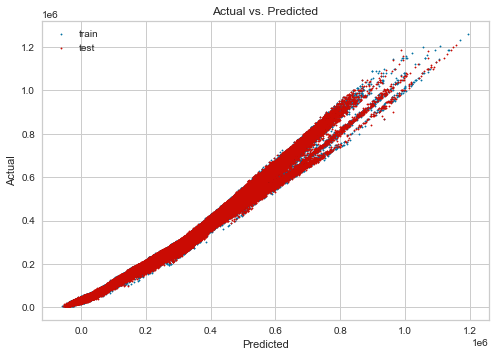

In [163]:
# plot accuracy
plt.scatter(model.predict(X_train), y_train, label='train', c='b', s=2)
plt.scatter(model.predict(X_test), y_test, label='test', c='r', s=2)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.title('Actual vs. Predicted')

In [164]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)
print("Lasso Train Score: ", model.score(X_train, y_train))
print("Lasso Test Score: ", model.score(X_test, y_test))

Lasso Train Score:  0.9837051567876209
Lasso Test Score:  0.9835766147076846


c:\Users\Akash\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+13, tolerance: 9.505e+11
  model = cd_fast.enet_coordinate_descent(


In [165]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
print("Ridge Train Score: ", model.score(X_train, y_train))
print("Ridge Test Score: ", model.score(X_test, y_test))

Ridge Train Score:  0.9837051793119745
Ridge Test Score:  0.9835767228560409
